# Task for Graduate Rotational Internship Program(GRIP) by The Sparks Foundation
# Batch - GRIPFEBRUARY24
# Domain - Data Science & Business Analytices
# Task 1 - Prediction of Student Percentage Using Supervised ML
# Name - Nure Jannat

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("student_scores - student_scores.csv")

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking for Outliers

In [18]:
Q1 = data['Scores'].quantile(0.25)
Q3 = data.Scores.quantile(0.75)
Q1, Q3

(30.0, 75.0)

In [19]:
IQR = Q3 - Q1
IQR

45.0

In [20]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-37.5, 142.5)

In [21]:
outlier_Scores= data[(data.Scores<lower_limit)|(data.Scores>upper_limit)]
outlier_Scores

,Hours,Scores


No outlier found for Study Scores

# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

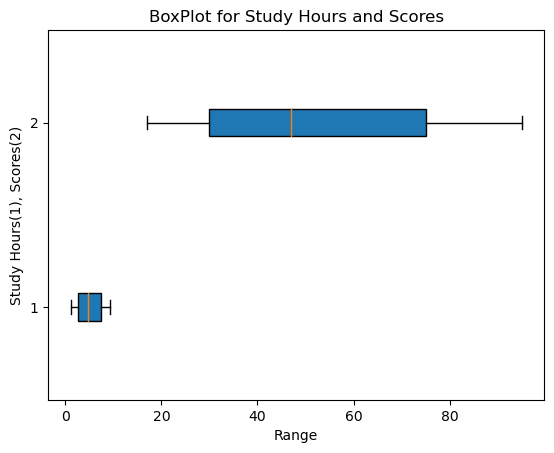

In [29]:
plt.boxplot(x=data,patch_artist=True, vert=False)
plt.title('BoxPlot for Study Hours and Scores')
plt.xlabel('Range')
plt.ylabel('Study Hours(1), Scores(2)')
plt.show

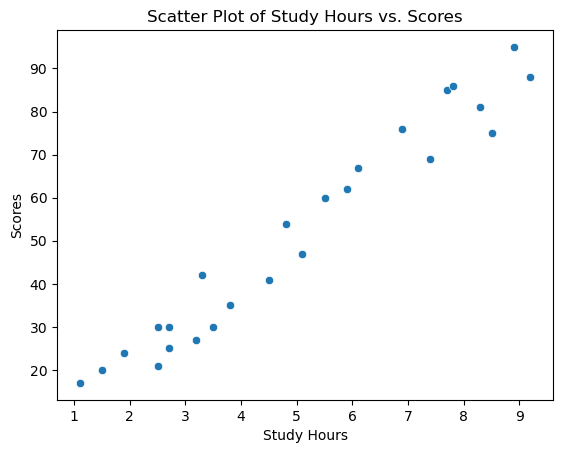

In [10]:
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Scatter Plot of Study Hours vs. Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

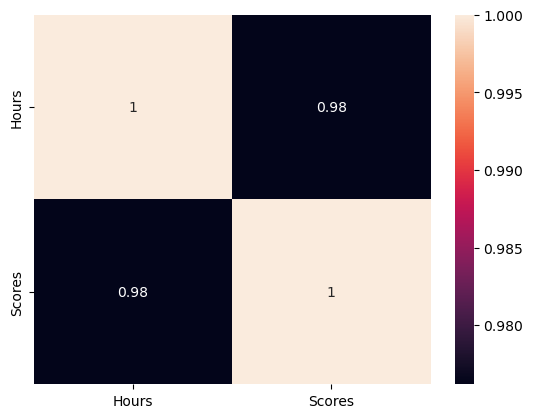

In [114]:
sns.heatmap(data.corr(),annot=True) 
plt.show()

In [67]:
X=data.iloc[:,:1].values
Y=data.iloc[:,1:].values

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=10)

In [131]:
X_train.shape

(17, 1)

In [132]:
X_test.shape

(8, 1)

In [133]:
X_train

array([[5.9],
       [3.8],
       [8.5],
       [6.9],
       [9.2],
       [6.1],
       [7.7],
       [4.8],
       [7.8],
       [8.3],
       [2.7],
       [2.5],
       [1.9],
       [2.5],
       [8.9],
       [3.5],
       [2.7]])

In [134]:
X_test

array([[1.5],
       [5.1],
       [3.3],
       [3.2],
       [4.5],
       [7.4],
       [1.1],
       [5.5]])

In [135]:
y_train

array([[62],
       [35],
       [75],
       [76],
       [88],
       [67],
       [85],
       [54],
       [86],
       [81],
       [30],
       [30],
       [24],
       [21],
       [95],
       [30],
       [25]], dtype=int64)

In [136]:
y_test

array([[20],
       [47],
       [42],
       [27],
       [41],
       [69],
       [17],
       [60]], dtype=int64)

# Building ML Model for Predicting Scores

In [137]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [138]:
model.coef_

array([[10.06790391]])

In [139]:
model.intercept_

array([1.21396494])

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [140]:
model.predict([[9.25]])

array([[94.34207607]])

If a person studies for 9.25 hours the predicted score would be 94.34207607

In [141]:
y_pred  = model.predict(X_test)
y_pred

array([[16.3158208 ],
       [52.56027486],
       [34.43804783],
       [33.43125744],
       [46.51953252],
       [75.71645385],
       [12.28865924],
       [56.58743642]])

In [142]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Hours", "Scores_original","Scores_predicted"])

,Hours,Scores_original,Scores_predicted
0,1.5,20.0,16.315821
1,5.1,47.0,52.560275
2,3.3,42.0,34.438048
3,3.2,27.0,33.431257
4,4.5,41.0,46.519533
5,7.4,69.0,75.716454
6,1.1,17.0,12.288659
7,5.5,60.0,56.587436


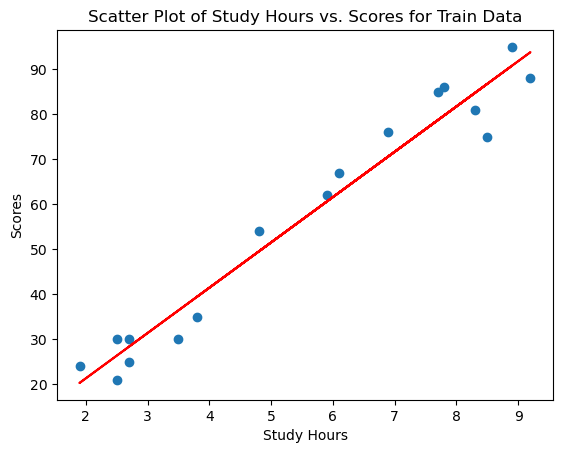

In [143]:
plt.scatter(X_train,y_train)
plt.plot(X_train, model.predict(X_train), color = "r")
plt.title('Scatter Plot of Study Hours vs. Scores for Train Data')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

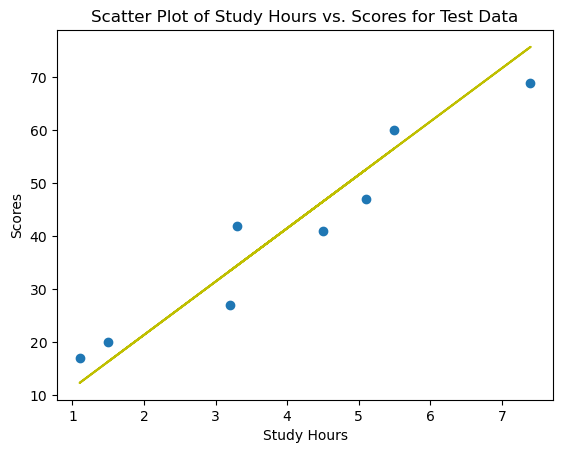

In [152]:
plt.scatter(X_test,y_test)
plt.plot(X_test, model.predict(X_test), color = "y")
plt.title('Scatter Plot of Study Hours vs. Scores for Test Data')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

# Model Evaluation

In [146]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred )
MSE

31.556542406092728

In [147]:
from sklearn.metrics import mean_absolute_error
MAE= mean_absolute_error(y_test, y_pred )
MAE

5.449694297153993

In [149]:
from sklearn.metrics import r2_score
r_Square = r2_score(y_test, y_pred)
r_Square

0.8944542088325093

# Thanks for exploring my work! Feel free to reach out if you have any questions or feedback.

# Best of luck with your predictions!